# **Traditional LSTM | Same Day Predictions | Normalized**

In [38]:
import numpy  as np
import pandas as pd

## Read In Datasets

* `msftSameDayNorm.csv`
* `appleSameDayNorm.csv`

In [39]:
aaplDf = pd.read_csv('appleSameDayNorm.csv')
msftDf = pd.read_csv('msftSameDayNorm.csv')

## Drop Attributes That Can't Be Used as Features

In [40]:
# Stock and Sentiment features

# aaplDf = aaplDf.drop(columns=['Unnamed: 0'])
# msftDf = msftDf.drop(columns=['Unnamed: 0'])

# Only stock Features

# aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])
# msftDf = msftDf.drop(columns=['Unnamed: 0', 'neg', 'neu', 'pos', 'compound'])

# Only Sentiment 

aaplDf = aaplDf.drop(columns=['Unnamed: 0', 'Open'])
msftDf = msftDf.drop(columns=['Unnamed: 0', 'Open'])


In [41]:
aaplDf.head()
#msftDf.head()


,neg,neu,pos,compound,label
0,0.032,0.905,0.063,0.7707,0
1,0.011,0.904,0.085,0.8720,0
2,0.029,0.878,0.093,0.6858,0
3,0.091,0.869,0.040,-0.6712,0
4,0.084,0.848,0.069,-0.1796,1


## Split into Data (`x`) and Label (`y`) Sets

In [42]:
yAppl = aaplDf['label']
xAppl = aaplDf.drop(columns = ['label'])

yMsft = msftDf['label']
xMsft = msftDf.drop(columns = ['label'])


## Split into Train and Test Sets

In [43]:
from sklearn.model_selection import train_test_split
# 90 - 10 : Train - Test Split
xTrainAppl, xTestAppl, yTrainAppl, yTestAppl = train_test_split(xAppl, yAppl, test_size=0.1, shuffle = False)
xTrainMsft, xTestMsft, yTrainMsft, yTestMsft = train_test_split(xMsft, yMsft, test_size=0.1, shuffle = False)

## Normalize the Data (`x`) Sets Using `MinMaxScaler`

In [44]:
from sklearn.preprocessing import MinMaxScaler

def scaleX(trainX, testX):
    scaler = MinMaxScaler()
    scaler.fit(trainX)
    trainX = scaler.transform(trainX)
    testX  = scaler.transform(testX)
    return trainX, testX

xTrainAppl, xTestAppl = scaleX(xTrainAppl, xTestAppl)
xTrainMsft, xTestMsft = scaleX(xTrainMsft, xTestMsft)

## Convert Label (`y`) Sets to `numpy` arrays

In [45]:
yTrainAppl = np.array(yTrainAppl.values.tolist())
yTestAppl  = np.array(yTestAppl.values.tolist())

yTrainMsft = np.array(yTrainMsft.values.tolist())
yTestMsft  = np.array(yTestMsft.values.tolist())

## Reshape Data(`x`) Sets Using `numpy`

In [46]:
xTrainAppl = np.reshape(xTrainAppl, (len(xTrainAppl) , 1 , xTrainAppl.shape[1]) ) # 5 because there are 5 features
xTestAppl  = np.reshape(xTestAppl,  (len(xTestAppl)  , 1 , xTestAppl.shape[1]) ) # 5 because there are 5 features

xTrainMsft = np.reshape(xTrainMsft, (len(xTrainMsft) , 1 , xTrainMsft.shape[1]) ) # 5 because there are 5 features
xTestMsft  = np.reshape(xTestMsft,  (len(xTestMsft)  , 1 , xTestMsft.shape[1]) ) # 5 because there are 5 features

## Traditional LSTM

In [47]:
import tensorflow   as     tf
from   tensorflow   import keras
from   keras        import Sequential
from   keras.layers import Dense
from   keras.layers import LSTM
from   keras.layers import Dropout

In [53]:
def makeLSTM(xTrain):
    model = Sequential()
    model.add (LSTM  (units = 50, activation = 'relu', input_shape = (xTrain.shape[1], xTrain.shape[2]), return_sequences=True)) # input_shape = (n_steps, n_features)
    model.add(Dropout(0.25))

    model.add (LSTM  (units = 25, activation = 'relu', return_sequences=True)) # input_shape = (n_steps, n_features)
    model.add(Dropout(0.25))

    model.add (Dense (units = 1, activation = 'sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

### Make LSTM for Each Set

In [54]:
# applLSTM = makeLSTM(xTrainAppl)
msftLSTM = makeLSTM(xTrainMsft)

### Fit Model for Each Set

In [55]:
# applHist = applLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftHist = msftLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)

Epoch 1/500
17/17 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5075 - val_loss: 0.6929 - val_accuracy: 0.5111
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5199 - val_loss: 0.6930 - val_accuracy: 0.5111
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5199 - val_loss: 0.6931 - val_accuracy: 0.5111
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5199 - val_loss: 0.6931 - val_accuracy: 0.5111
Epoch 5/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5199 - val_loss: 0.6932 - val_accuracy: 0.5111
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5199 - val_loss: 0.6932 - val_accuracy: 0.5111
Epoch 7/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5199 - val_loss: 0.6933 - val_accuracy: 0.5111
Epoch 8/500


Epoch 59/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5240 - val_loss: 0.6919 - val_accuracy: 0.5333
Epoch 60/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5290 - val_loss: 0.6908 - val_accuracy: 0.5333
Epoch 61/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5299 - val_loss: 0.6906 - val_accuracy: 0.5556
Epoch 62/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5282 - val_loss: 0.6910 - val_accuracy: 0.5481
Epoch 63/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5323 - val_loss: 0.6898 - val_accuracy: 0.5185
Epoch 64/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5249 - val_loss: 0.6911 - val_accuracy: 0.5407
Epoch 65/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5232 - val_loss: 0.6909 - val_accuracy: 0.5704
Epoch 

17/17 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5315 - val_loss: 0.6894 - val_accuracy: 0.5407
Epoch 117/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5265 - val_loss: 0.6889 - val_accuracy: 0.5481
Epoch 118/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5332 - val_loss: 0.6894 - val_accuracy: 0.5333
Epoch 119/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5473 - val_loss: 0.6889 - val_accuracy: 0.5407
Epoch 120/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5282 - val_loss: 0.6880 - val_accuracy: 0.5333
Epoch 121/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5216 - val_loss: 0.6896 - val_accuracy: 0.5407
Epoch 122/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5332 - val_loss: 0.6896 - val_accuracy: 0.5481
Epoch 123/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5448 - val_loss: 0.6898 - val_accuracy: 0.5407
Epoch 174/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5340 - val_loss: 0.6897 - val_accuracy: 0.5407
Epoch 175/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5307 - val_loss: 0.6891 - val_accuracy: 0.5407
Epoch 176/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5398 - val_loss: 0.6880 - val_accuracy: 0.5407
Epoch 177/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5323 - val_loss: 0.6876 - val_accuracy: 0.5481
Epoch 178/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5257 - val_loss: 0.6877 - val_accuracy: 0.5481
Epoch 179/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5373 - val_loss: 0.6882 - val_accuracy: 0.5333
Epoch 180/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5357 - val_loss: 0.6852 - val_accuracy: 0.5333
Epoch 231/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.5390 - val_loss: 0.6841 - val_accuracy: 0.5259
Epoch 232/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5232 - val_loss: 0.6832 - val_accuracy: 0.5333
Epoch 233/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5348 - val_loss: 0.6829 - val_accuracy: 0.5333
Epoch 234/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5348 - val_loss: 0.6849 - val_accuracy: 0.5259
Epoch 235/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5415 - val_loss: 0.6847 - val_accuracy: 0.5333
Epoch 236/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5315 - val_loss: 0.6834 - val_accuracy: 0.5556
Epoch 237/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5431 - val_loss: 0.6940 - val_accuracy: 0.4815
Epoch 288/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5158 - val_loss: 0.6919 - val_accuracy: 0.5037
Epoch 289/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5307 - val_loss: 0.6910 - val_accuracy: 0.5037
Epoch 290/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5299 - val_loss: 0.6920 - val_accuracy: 0.5259
Epoch 291/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5348 - val_loss: 0.6927 - val_accuracy: 0.5185
Epoch 292/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5290 - val_loss: 0.6924 - val_accuracy: 0.5037
Epoch 293/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5307 - val_loss: 0.6908 - val_accuracy: 0.5037
Epoch 294/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5290 - val_loss: 0.6897 - val_accuracy: 0.5185
Epoch 345/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5315 - val_loss: 0.6891 - val_accuracy: 0.5185
Epoch 346/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5381 - val_loss: 0.6891 - val_accuracy: 0.5185
Epoch 347/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5498 - val_loss: 0.6886 - val_accuracy: 0.5185
Epoch 348/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5448 - val_loss: 0.6882 - val_accuracy: 0.5185
Epoch 349/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5390 - val_loss: 0.6896 - val_accuracy: 0.5259
Epoch 350/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5365 - val_loss: 0.6912 - val_accuracy: 0.5259
Epoch 351/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5423 - val_loss: 0.6874 - val_accuracy: 0.5333
Epoch 402/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5498 - val_loss: 0.6883 - val_accuracy: 0.5185
Epoch 403/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5398 - val_loss: 0.6892 - val_accuracy: 0.5185
Epoch 404/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5481 - val_loss: 0.6913 - val_accuracy: 0.5407
Epoch 405/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.5522 - val_loss: 0.6916 - val_accuracy: 0.5556
Epoch 406/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5415 - val_loss: 0.6908 - val_accuracy: 0.5259
Epoch 407/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.5357 - val_loss: 0.6921 - val_accuracy: 0.5259
Epoch 408/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5456 - val_loss: 0.6934 - val_accuracy: 0.5185
Epoch 459/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.5348 - val_loss: 0.6920 - val_accuracy: 0.5185
Epoch 460/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5406 - val_loss: 0.6913 - val_accuracy: 0.5185
Epoch 461/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5506 - val_loss: 0.6926 - val_accuracy: 0.5185
Epoch 462/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.5473 - val_loss: 0.6917 - val_accuracy: 0.5111
Epoch 463/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5398 - val_loss: 0.6909 - val_accuracy: 0.5111
Epoch 464/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5680 - val_loss: 0.6923 - val_accuracy: 0.5111
Epoch 465/500

### Make Plots to Evaluate Each Model

In [56]:
import matplotlib.pyplot as plt

def makePlots(title, hist):
    train_acc   =  hist.history['accuracy']
    test_acc    =  hist.history['val_accuracy']
    train_loss  =  hist.history['loss']
    test_loss   =  hist.history['val_loss']

    fig= plt.figure(figsize=(10,5))

    plt.subplot(1, 1, 1) # (2-row , 1-column figure , 1st figure)
    plt.plot(train_acc, label = 'Training Accuracy')
    plt.plot(test_acc, label = 'Test Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Test Accuracy')
    plt.show()
    
    fig.savefig(title + '_accuracy.jpg')

    fig= plt.figure(figsize=(10,5))

    plt.subplot(1, 1, 1) # (2-row , 1-column figure , 2nd figure)
    plt.plot(train_loss, label = 'Training Loss')
    plt.plot(test_loss, label = 'Testing Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.title(title + ' | Training and Testing Loss')
    plt.show()
    
    fig.savefig(title + '_loss.jpg')
    return

In [57]:
# makePlots("Apple LSTM" , applHist)

NameError: name 'applHist' is not defined

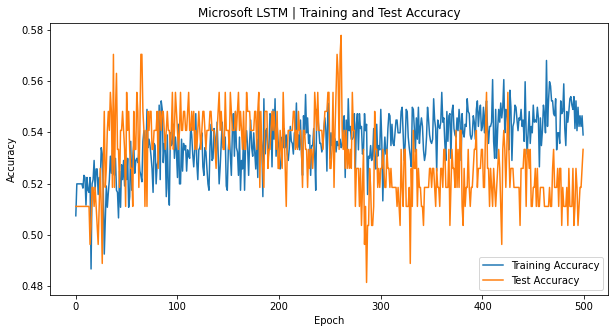

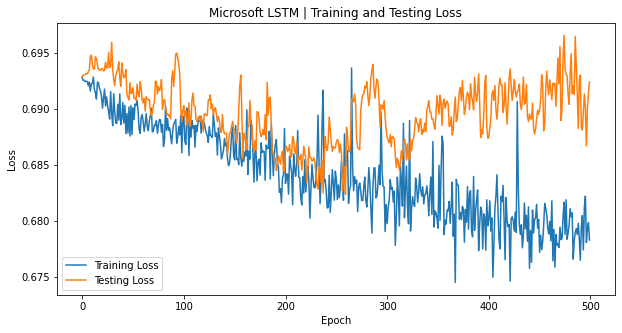

In [58]:
makePlots("Microsoft LSTM" , msftHist)

## Bidirectional LSTM

In [16]:
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

def makeBidirectionalLSTM(xTrain):
    model = Sequential()
    
    model.add (Bidirectional(LSTM(units =50 , activation = 'relu', return_sequences=True),
                             input_shape=(xTrain.shape[1], xTrain.shape[2])))
    model.add(Dropout(0.25))

    model.add (Bidirectional(LSTM(units = 25, activation = 'relu', return_sequences=True)))
    model.add(Dropout(0.25))

    model.add (TimeDistributed(Dense (units = 1, activation = 'sigmoid')))
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=['accuracy'])
    return model

### Make Bidirectional LSTM for Each Set

In [17]:
applBiLSTM = makeBidirectionalLSTM(xTrainAppl)
msftBiLSTM = makeBidirectionalLSTM(xTrainMsft)

### Fit Model for Each Set

In [18]:
applBiHist = applBiLSTM.fit(xTrainAppl, yTrainAppl, batch_size = 72, validation_data=(xTestAppl, yTestAppl), epochs = 500, shuffle=False)
msftBiHist = msftBiLSTM.fit(xTrainMsft, yTrainMsft, batch_size = 72, validation_data=(xTestMsft, yTestMsft), epochs = 500, shuffle=False)

Epoch 1/500
30/30 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5206 - val_loss: 0.6927 - val_accuracy: 0.5279
Epoch 2/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5225 - val_loss: 0.6923 - val_accuracy: 0.5279
Epoch 3/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5225 - val_loss: 0.6921 - val_accuracy: 0.5279
Epoch 4/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5225 - val_loss: 0.6919 - val_accuracy: 0.5279
Epoch 5/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5225 - val_loss: 0.6918 - val_accuracy: 0.5279
Epoch 6/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5225 - val_loss: 0.6917 - val_accuracy: 0.5279
Epoch 7/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5225 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 8/500


Epoch 59/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5201 - val_loss: 0.6944 - val_accuracy: 0.5236
Epoch 60/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5301 - val_loss: 0.6944 - val_accuracy: 0.5236
Epoch 61/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5311 - val_loss: 0.6943 - val_accuracy: 0.5279
Epoch 62/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5311 - val_loss: 0.6941 - val_accuracy: 0.5708
Epoch 63/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5254 - val_loss: 0.6941 - val_accuracy: 0.5408
Epoch 64/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5368 - val_loss: 0.6940 - val_accuracy: 0.5365
Epoch 65/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5234 - val_loss: 0.6944 - val_accuracy: 0.5365
Epoch 

30/30 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5297 - val_loss: 0.6937 - val_accuracy: 0.5193
Epoch 174/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5378 - val_loss: 0.6934 - val_accuracy: 0.5107
Epoch 175/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5297 - val_loss: 0.6938 - val_accuracy: 0.5107
Epoch 176/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5230 - val_loss: 0.6938 - val_accuracy: 0.5150
Epoch 177/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5211 - val_loss: 0.6937 - val_accuracy: 0.4979
Epoch 178/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5273 - val_loss: 0.6935 - val_accuracy: 0.5150
Epoch 179/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5215 - val_loss: 0.6937 - val_accuracy: 0.5150
Epoch 180/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5325 - val_loss: 0.6952 - val_accuracy: 0.5193
Epoch 288/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5311 - val_loss: 0.6947 - val_accuracy: 0.5279
Epoch 289/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5397 - val_loss: 0.6960 - val_accuracy: 0.5107
Epoch 290/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5297 - val_loss: 0.6960 - val_accuracy: 0.5193
Epoch 291/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5388 - val_loss: 0.6955 - val_accuracy: 0.5107
Epoch 292/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5258 - val_loss: 0.6952 - val_accuracy: 0.5150
Epoch 293/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5411 - val_loss: 0.6957 - val_accuracy: 0.5064
Epoch 294/500

30/30 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5440 - val_loss: 0.7006 - val_accuracy: 0.5021
Epoch 402/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5416 - val_loss: 0.7012 - val_accuracy: 0.4936
Epoch 403/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5402 - val_loss: 0.7011 - val_accuracy: 0.5064
Epoch 404/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5493 - val_loss: 0.6992 - val_accuracy: 0.5193
Epoch 405/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5431 - val_loss: 0.7000 - val_accuracy: 0.5064
Epoch 406/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5335 - val_loss: 0.7020 - val_accuracy: 0.5107
Epoch 407/500
30/30 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5378 - val_loss: 0.7006 - val_accuracy: 0.5021
Epoch 408/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6932 - val_accuracy: 0.5111
Epoch 16/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5199 - val_loss: 0.6933 - val_accuracy: 0.5111
Epoch 17/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6933 - val_accuracy: 0.5111
Epoch 18/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5199 - val_loss: 0.6934 - val_accuracy: 0.5111
Epoch 19/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5199 - val_loss: 0.6934 - val_accuracy: 0.5111
Epoch 20/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6934 - val_accuracy: 0.5111
Epoch 21/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5199 - val_loss: 0.6935 - val_accuracy: 0.5111
Epoch 22/500
17/17 

Epoch 73/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5249 - val_loss: 0.6937 - val_accuracy: 0.5185
Epoch 74/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5323 - val_loss: 0.6935 - val_accuracy: 0.5037
Epoch 75/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5249 - val_loss: 0.6934 - val_accuracy: 0.5111
Epoch 76/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5265 - val_loss: 0.6934 - val_accuracy: 0.5111
Epoch 77/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5274 - val_loss: 0.6935 - val_accuracy: 0.5111
Epoch 78/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5199 - val_loss: 0.6936 - val_accuracy: 0.5111
Epoch 79/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5224 - val_loss: 0.6937 - val_accuracy: 0.5111
Epoch 

17/17 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5398 - val_loss: 0.6894 - val_accuracy: 0.5333
Epoch 188/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5572 - val_loss: 0.6894 - val_accuracy: 0.5333
Epoch 189/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5514 - val_loss: 0.6896 - val_accuracy: 0.5333
Epoch 190/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5622 - val_loss: 0.6892 - val_accuracy: 0.5185
Epoch 191/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5489 - val_loss: 0.6893 - val_accuracy: 0.5333
Epoch 192/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5547 - val_loss: 0.6902 - val_accuracy: 0.5333
Epoch 193/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5489 - val_loss: 0.6897 - val_accuracy: 0.5259
Epoch 194/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5564 - val_loss: 0.6916 - val_accuracy: 0.5185
Epoch 302/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5481 - val_loss: 0.6912 - val_accuracy: 0.5111
Epoch 303/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5522 - val_loss: 0.6913 - val_accuracy: 0.5259
Epoch 304/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5597 - val_loss: 0.6914 - val_accuracy: 0.5111
Epoch 305/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.5614 - val_loss: 0.6920 - val_accuracy: 0.5185
Epoch 306/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5597 - val_loss: 0.6919 - val_accuracy: 0.5037
Epoch 307/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5713 - val_loss: 0.6918 - val_accuracy: 0.5111
Epoch 308/500

17/17 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5531 - val_loss: 0.6946 - val_accuracy: 0.5259
Epoch 416/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5614 - val_loss: 0.6944 - val_accuracy: 0.5407
Epoch 417/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5506 - val_loss: 0.6943 - val_accuracy: 0.5333
Epoch 418/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.5564 - val_loss: 0.6943 - val_accuracy: 0.5407
Epoch 419/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5663 - val_loss: 0.6945 - val_accuracy: 0.5259
Epoch 420/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5663 - val_loss: 0.6942 - val_accuracy: 0.5111
Epoch 421/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5630 - val_loss: 0.6945 - val_accuracy: 0.5185
Epoch 422/500

### Make Plots to Evaluate Each Model

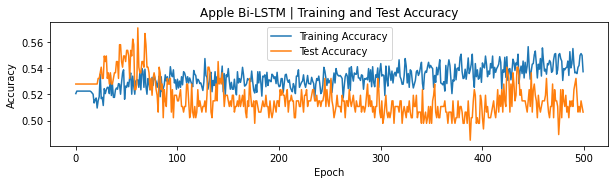

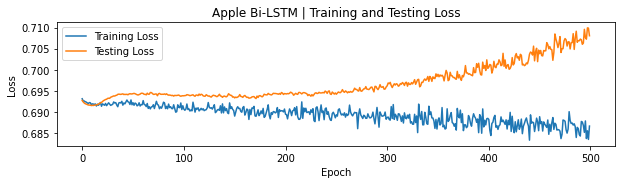

In [19]:
makePlots("Apple Bi-LSTM" , applBiHist)

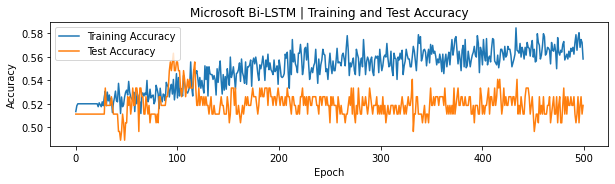

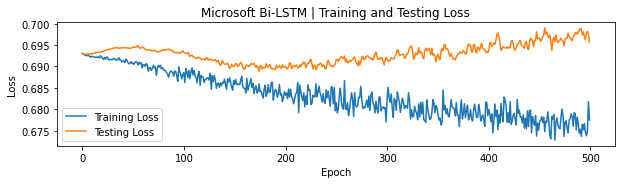

In [20]:
makePlots("Microsoft Bi-LSTM" , msftBiHist)